In this data set I am gonna try to stablish the co-relation with Public Transport Stops and Public Toilets. Both data sets have been adquire in the goverment page and they are free of use. 

Stops : https://www.data.gv.at/katalog/dataset/21fca925-12ac-4215-ba1a-a9c73cb3b082 Last update 27.01.2022

Public Toilets: https://www.data.gv.at/katalog/dataset/146384fc-3f64-4482-a78a-2f082411a27d  Last update: 08.10.2022


In [125]:
import pandas as pd
import numpy as np
import math

import geopandas as gpd
import json
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

from geopandas.tools import geocode
from shapely.geometry import LineString, MultiPolygon, Point, box

In [ ]:
#read document to see the features of the stop file 
data = json.load(open("stops.json"))
data #We see that we are interested in the features

In [ ]:
for i in data ["features"]: #exploring the elements of the features 
    print (i) 

In [ ]:
print(json.dumps(data, sort_keys=True, indent=0))

In [129]:
df = pd.DataFrame(data["features"])
df.head()

,type,id,geometry,geometry_name,properties
0,Feature,HALTESTELLEWLOGD.1,"{'type': 'Point', 'coordinates': [16.389770011...",SHAPE,"{'OBJECTID': 1, 'BEZEICHNUNG': 'Absberggasse',..."
1,Feature,HALTESTELLEWLOGD.2,"{'type': 'Point', 'coordinates': [16.448900012...",SHAPE,"{'OBJECTID': 2, 'BEZEICHNUNG': 'Achengasse', '..."
2,Feature,HALTESTELLEWLOGD.3,"{'type': 'Point', 'coordinates': [16.385810011...",SHAPE,"{'OBJECTID': 3, 'BEZEICHNUNG': 'Ada-Christen-G..."
3,Feature,HALTESTELLEWLOGD.4,"{'type': 'Point', 'coordinates': [16.535120013...",SHAPE,"{'OBJECTID': 4, 'BEZEICHNUNG': 'Adam-Betz-Gass..."
4,Feature,HALTESTELLEWLOGD.5,"{'type': 'Point', 'coordinates': [16.337990012...",SHAPE,"{'OBJECTID': 5, 'BEZEICHNUNG': 'Adamovichgasse..."


In [130]:
gds = gpd.read_file("stops.json") #having a better visualization of the file 

gds

,id,OBJECTID,BEZEICHNUNG,WL_NUMMER,SE_ANNO_CAD_DATA,geometry
0,HALTESTELLEWLOGD.1,1,Absberggasse,1,None,POINT (16.38977 48.17379)
1,HALTESTELLEWLOGD.2,2,Achengasse,2,None,POINT (16.44890 48.28453)
2,HALTESTELLEWLOGD.3,3,Ada-Christen-Gasse,3,None,POINT (16.38581 48.15293)
3,HALTESTELLEWLOGD.4,4,Adam-Betz-Gasse,4,None,POINT (16.53512 48.21564)
4,HALTESTELLEWLOGD.5,5,Adamovichgasse,5,None,POINT (16.33799 48.14229)
...,...,...,...,...,...,...
1802,HALTESTELLEWLOGD.1810,1810,,3558,None,POINT (16.54933 48.20507)
1803,HALTESTELLEWLOGD.1811,1811,,8114,None,POINT (16.36002 48.18382)
1804,HALTESTELLEWLOGD.1814,1814,,9100,None,POINT (16.37112 48.25551)
1805,HALTESTELLEWLOGD.1816,1816,,14198,None,POINT (16.36634 48.20031)


In [131]:
print(gds.crs)  #stablishing the coodfinare reference system of this file 

epsg:4326


In [132]:
gds= gds.to_crs(4326)
gds

,id,OBJECTID,BEZEICHNUNG,WL_NUMMER,SE_ANNO_CAD_DATA,geometry
0,HALTESTELLEWLOGD.1,1,Absberggasse,1,None,POINT (16.38977 48.17379)
1,HALTESTELLEWLOGD.2,2,Achengasse,2,None,POINT (16.44890 48.28453)
2,HALTESTELLEWLOGD.3,3,Ada-Christen-Gasse,3,None,POINT (16.38581 48.15293)
3,HALTESTELLEWLOGD.4,4,Adam-Betz-Gasse,4,None,POINT (16.53512 48.21564)
4,HALTESTELLEWLOGD.5,5,Adamovichgasse,5,None,POINT (16.33799 48.14229)
...,...,...,...,...,...,...
1802,HALTESTELLEWLOGD.1810,1810,,3558,None,POINT (16.54933 48.20507)
1803,HALTESTELLEWLOGD.1811,1811,,8114,None,POINT (16.36002 48.18382)
1804,HALTESTELLEWLOGD.1814,1814,,9100,None,POINT (16.37112 48.25551)
1805,HALTESTELLEWLOGD.1816,1816,,14198,None,POINT (16.36634 48.20031)


In [133]:
gds = gds.set_index("BEZEICHNUNG")

In [134]:
gds["centroid"] = gds.centroid 
gds["centroid"]

C:\Users\maria\AppData\Local\Temp\ipykernel_3200\3255847657.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gds["centroid"] = gds.centroid


BEZEICHNUNG
Absberggasse          POINT (16.38977 48.17379)
Achengasse            POINT (16.44890 48.28453)
Ada-Christen-Gasse    POINT (16.38581 48.15293)
Adam-Betz-Gasse       POINT (16.53512 48.21564)
Adamovichgasse        POINT (16.33799 48.14229)
                                ...            
                      POINT (16.54933 48.20507)
                      POINT (16.36002 48.18382)
                      POINT (16.37112 48.25551)
                      POINT (16.36634 48.20031)
                      POINT (16.36057 48.21222)
Name: centroid, Length: 1807, dtype: geometry

In [135]:
plt.rcParams['figure.figsize'] = (16.0, 12.8) #stablishing the parameters of the map

<AxesSubplot:>

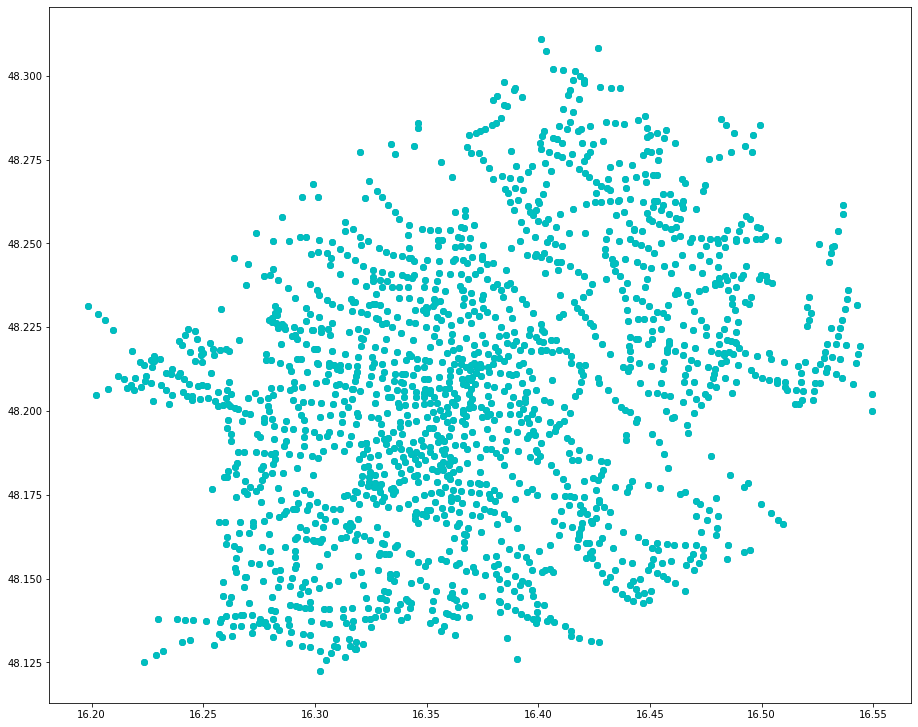

In [136]:
ax = gds["geometry"].plot()
gds["centroid"].plot(ax=ax, color="c")

In [137]:
gds.explore(
    legend=True,
    cmap="cool",
    control_scale=True,
) #blue points public are transport stops, with the function explore we have a better overview of the stops location 

In [ ]:
#now we are going to read our second map 
#read document of public toilets
datap = json.load(open("ptoilets.json"))
datap

In [139]:
td = pd.DataFrame(datap["features"]) #looking at the columns of our file
td.head()

,type,id,geometry,geometry_name,properties
0,Feature,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319b,"{'type': 'Point', 'coordinates': [16.349725322...",SHAPE,"{'OBJECTID': 106020, 'WC_ID': 'M48_0034', 'BEZ..."
1,Feature,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319c,"{'type': 'Point', 'coordinates': [16.358506087...",SHAPE,"{'OBJECTID': 106021, 'WC_ID': 'M48_0054', 'BEZ..."
2,Feature,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319d,"{'type': 'Point', 'coordinates': [16.338422066...",SHAPE,"{'OBJECTID': 106022, 'WC_ID': 'M48_0070', 'BEZ..."
3,Feature,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319e,"{'type': 'Point', 'coordinates': [16.386622597...",SHAPE,"{'OBJECTID': 106023, 'WC_ID': 'M48_0058', 'BEZ..."
4,Feature,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319f,"{'type': 'Point', 'coordinates': [16.228422139...",SHAPE,"{'OBJECTID': 106024, 'WC_ID': 'M48_0089', 'BEZ..."


In [155]:
gtd = gpd.read_file("ptoilets.json", sep= r'\s*,\s*', engine = "python") #in case that there are some white spaces to be removed 

gtd

,id,OBJECTID,WC_ID,BEZIRK,STRASSE,ORTSANGABE,AKTIV,AKTIV_TXT,OEFFNUNGSZEIT,EINSCHRAENKUNGEN,PERSONALBETREUUNG,KATEGORIE,AUSSTATTUNG,ICON,ICON_TXT,KONTAKT,ABTEILUNG,INFORMATION,SE_ANNO_CAD_DATA,geometry
0,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319b,106020,M48_0034,5,Eichenstraße / Fendigasse,Abgang zur Straßenbahn,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,nein - gratis,Unisex 1; Pissoir,Euro Key,U,Damen und Herren,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.34973 48.18077)
1,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319c,106021,M48_0054,9,Liechtensteinpark,None,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,nein - gratis,Unisex 1; barrierefrei 1,Euro Key,B,Barrierefrei,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.35851 48.22288)
2,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319d,106022,M48_0070,12,Aßmayergasse / Karl-Löwe-Gasse,None,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,nein - gratis,Pissoir,keine,M,Herren,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.33842 48.17764)
3,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319e,106023,M48_0058,10,Puchsbaumplatz,ggü. ONr. 11,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,nein - gratis,Pissoir,keine,M,Herren,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.38662 48.17268)
4,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_319f,106024,M48_0089,14,Mariabrunn,bei der Kirche,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,nein - gratis,Unisex 1; barrierefrei 1,Euro Key,B,Barrierefrei,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.22842 48.20728)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_32a6,105944,M48_0137,21,Am Spitz,"ONr. 1, Amtshaus",-1,JA,00:00-24:00 Uhr,Sonn- und Feiertag geschlossen,Mo-Fr: 10-18Uhr,Herren 2; Herren Nacht 1; Damen Nacht 1; Damen...,"Defibrilator, Feuerlöscher, Erste Hilfe Kasten",U,Damen und Herren,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.39764 48.25792)
268,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_32a7,105945,M48_0004,1,Rathauspark / Ring,None,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,Mo-So: 10-17 Uhr,Pissoir; Damen 6; Herren 3,"Defibrilator, Feuerlöscher, Erste Hilfe Kasten",U,Damen und Herren,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.36040 48.21097)
269,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_32a8,105946,M48_0008,1,Schottentor / Passage,None,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,Mo-Fr: 6-20 Uhr; Sa: 7-19 Uhr; So+FT: 9-19 Uhr,barrierefrei 1; Pissoir; Damen 7; Herren 6,"Defibrilator, Feuerlöscher, Erste Hilfe Kasten",B,Barrierefrei,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.36269 48.21393)
270,WCANLAGE2OGD.fid-7c5d446c_17eba51fd65_32a9,105947,M48_0069,11,Zentralfriedhof / Tor III,None,-1,JA,00:00-24:00 Uhr,ganzjährig ohne Einschränkungen,Okt-Apr: Mo-So: 8-18 Uhr; Mai-Sep: Mo-So: 8-20...,Pissoir; Herren 1; Damen 2,Euro Key,U,Damen und Herren,+43 (1) 546 48,MA 48,https://www.wien.gv.at/umwelt/ma48/sauberestad...,None,POINT (16.44829 48.15225)


In [146]:
print(gtd.crs) 
#looking at the coordinate reference system and confirm that they are the same as our last file

epsg:4326


In [156]:
gtd = gtd.set_index("STRASSE")

In [157]:
gtd["centroid"] = gtd.centroid
gtd["centroid"]

C:\Users\maria\AppData\Local\Temp\ipykernel_3200\302662376.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gtd["centroid"] = gtd.centroid


STRASSE
Eichenstraße / Fendigasse           POINT (16.34973 48.18077)
Liechtensteinpark                   POINT (16.35851 48.22288)
Aßmayergasse / Karl-Löwe-Gasse      POINT (16.33842 48.17764)
Puchsbaumplatz                      POINT (16.38662 48.17268)
Mariabrunn                          POINT (16.22842 48.20728)
                                              ...            
Am Spitz                            POINT (16.39764 48.25792)
Rathauspark / Ring                  POINT (16.36040 48.21097)
Schottentor / Passage               POINT (16.36269 48.21393)
Zentralfriedhof / Tor III           POINT (16.44829 48.15225)
Floridsdorfer Markt / Pitkagasse    POINT (16.40187 48.26135)
Name: centroid, Length: 272, dtype: geometry

In [158]:
#print(gtd["STRASSE"].unique())

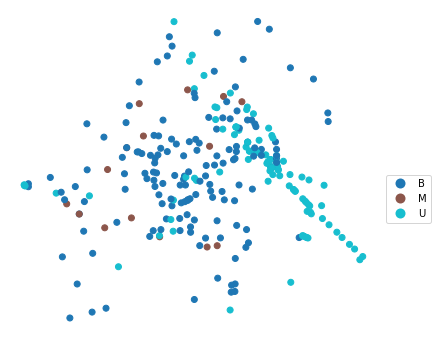

In [159]:

fig, ax = plt.subplots(figsize=(14, 6))
gtd.plot(column="ICON",
                categorical=True,
                legend=True,
                ax=ax)
#legend location
leg =  ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))
ax.set_axis_off()

#map of the city of vienna diferientating with colors the diferent types of WC

In [160]:
tpalette= {'B': 'c',
           'M': 'r',
           'U': 'y'}
tpalette #dictionary of the different icons for the public toiles 

{'B': 'c', 'M': 'r', 'U': 'y'}

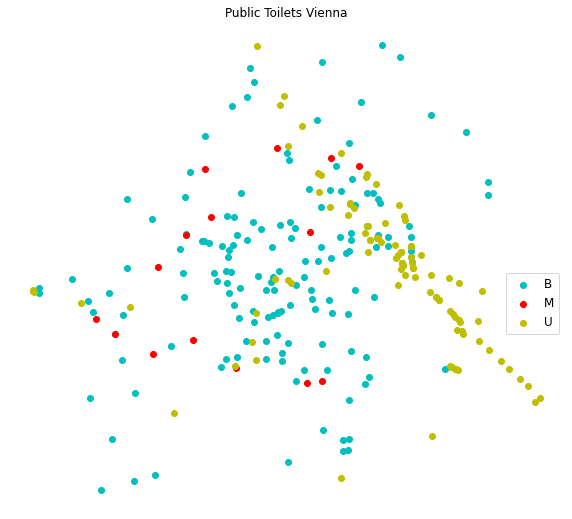

In [161]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

#create a loop
for Ttype, gtd in gtd.groupby("ICON"):
    color= tpalette[Ttype]
    gtd.plot(color=color,
            ax=ax,
            label=Ttype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title="Public Toilets Vienna")

ax.set_axis_off()

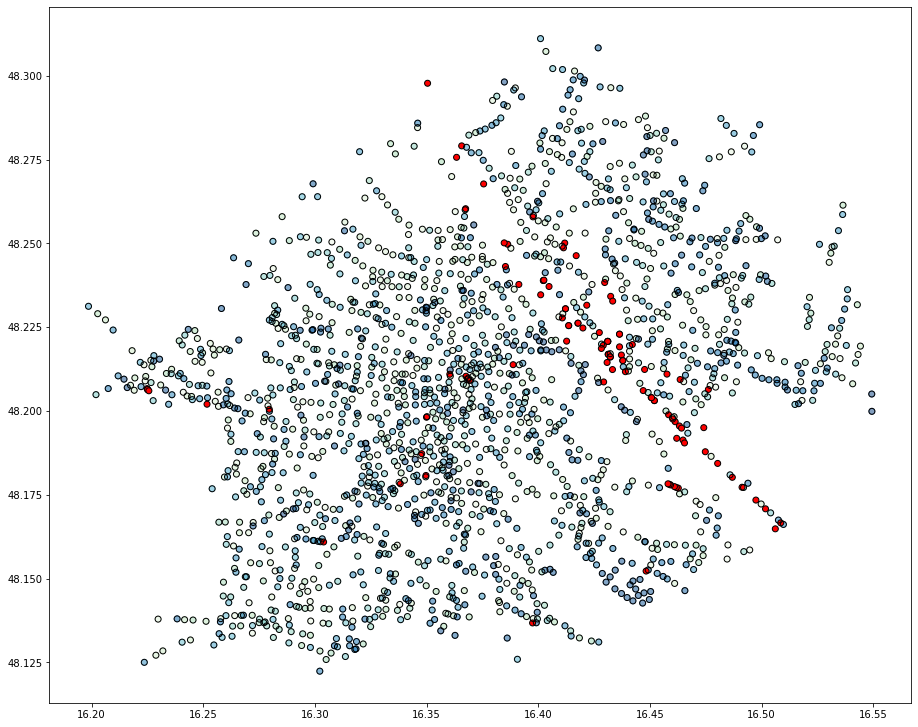

In [162]:
union_st = gtd.overlay(gds, how="union")
ax =union_st.plot(alpha=0.5, cmap="GnBu")
gtd.plot(ax=ax, column= "ICON", cmap="hsv", edgecolor="k");
gds.plot(ax=ax, facecolor="none", edgecolor="k");

#In this map we can see the overlaping spots were the both of the two maps
#have common points 

Spatial Joints 

In [25]:
import folium

In [169]:
m = gds.explore(
    k=10,
    popup=True, #show values on popup
    style_kwds=dict(color="black"), 
    legend=True,
    legend_kwds=dict(colorbar=False),
    name="BEZEICHNUNG",
    zoom_start=10
   );
gtd.explore(
    m=m, #pass the map object of the public toilets into this map 
    cmap= "Set1",#use Set1 as the color map
    marker_kwds=dict(radius= 0.5, icon="info-sign", color="cadetblue"),
    tooltip= "STRASSE",
    tooltip_kwds=dict(labels=False),
    name="ICON"
    )
folium.TileLayer('https://{s}.tile.jawg.io/jawg-streets/{z}/{x}/{y}{r}.png?access-token={accessToken}', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control= True).add_to(m)

folium.LayerControl().add_to(m)

m

In the map above the are many erros that I could not find an explanation for them. I can guess the base layer of one of them it is not good define and when overlaping it moves. This could explain why it creates new points when moving.

With this map I just wanted to create an overview in the city of vienna of the public WC in corelation with all of the public stops. Obviosly, I failed as the data visualisation map that I created does not fulfill it purpuse. But after many tries of going back to the data checking the EPSG, to see if that was a problem (which then it solved the error of the centroid but did not solve the problem of map), I could not find a logical explanation for this error. 